In [44]:
import numpy as np
import rasterio as rio
import cv2
import matplotlib.pyplot as plt
import os

In [50]:
def couper(im, new_width, new_length):
    tiles = [im[x:x+new_width, y:y+new_length, :] for x in range(0,im.shape[0],new_width) for y in range(0,im.shape[1],new_length)]
    return tiles

def openImages(path):
    raster = rio.open(path)
    band1 = raster.read(1)
    band2 = raster.read(2)
    band3 = raster.read(3)
    band4 = raster.read(4)
    img = cv2.merge((band1, band2,
                    band3, band4))
    return img

In [48]:
list_image = os.listdir('documents-export-2023-11-20')
print(list_image)

['crop_SENTINEL2A_20210614-105728-822_L2A_T31UDQ_C_V3-0.tif', 'crop_SENTINEL2A_20220209-105727-506_L2A_T31UDQ_C_V3-0.tif', 'crop_SENTINEL2B_20190921-110724-040_L2A_T31UDQ_C_V2-2.tif', 'crop_SENTINEL2A_20210902-105729-493_L2A_T31UDQ_C_V3-0.tif', 'crop_SENTINEL2A_20171122-105612-379_L2A_T31UDQ_C_V2-2.tif', 'crop_SENTINEL2A_20160312-105037-460_L2A_T31UDQ_D_V1-1.tif', 'crop_SENTINEL2A_20180504-110230-455_L2A_T31UDQ_C_V2-2.tif', 'crop_SENTINEL2A_20200420-105729-229_L2A_T31UDQ_C_V2-2.tif', 'crop_SENTINEL2B_20220813-105731-636_L2A_T31UDQ_C_V3-0.tif', 'crop_SENTINEL2A_20201126-105729-415_L2A_T31UDQ_C_V2-2.tif', 'crop_SENTINEL2A_20220719-105740-176_L2A_T31UDQ_C_V3-0.tif', 'crop_SENTINEL2A_20210329-110722-345_L2A_T31UDQ_C_V2-2.tif', 'crop_SENTINEL2A_20160822-110529-373_L2A_T31UDQ_D_V1-1.tif', 'crop_SENTINEL2A_20230528-110728-390_L2A_T31UDQ_C_V3-1.tif', 'crop_SENTINEL2A_20200530-105734-586_L2A_T31UDQ_C_V2-2.tif', 'crop_SENTINEL2B_20180225-105018-458_L2A_T31UDQ_C_V2-2.tif', 'crop_SENTINEL2B_202104

In [54]:
for image in list_image:
    image_tmp = openImages('documents-export-2023-11-20/'+image)
    many_images = couper(image_tmp, new_length=527, new_width=527)
    cv2.imwrite('results_coupure/'+image, many_images[0])

/home/afonso/miniconda3/envs/filRouge/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


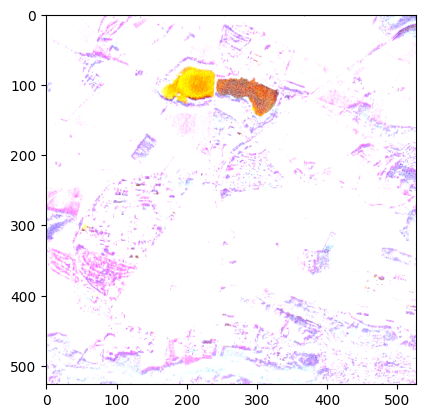

In [56]:
im1 = openImages('/home/afonso/FilRouge_territoires/results_coupure/crop_SENTINEL2A_20151226-111142-750_L2A_T31UDQ_D_V1-1.tif')
plt.figure()
plt.imshow(im1)